# Functions

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# We need to create a categorical encoding scheme for mappying sourcce
# and destination
def col_encoder(col_name):
    """
    Take column from dataset and returns an encoded array
    
    """
    labeler = LabelEncoder()
    labels = labeler.fit_transform(col_name)
    mappings = {index: label for index, label in enumerate(labeler.classes_)}
    print(mappings)
    return labels

def mini_plot(color_scheme, data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(20,10)})
        
        ax = sns.countplot(x=data[col], hue=color_scheme, data=data)

# Data loading and first looks

## Importing data and initial cleaning

In [2]:
# load tools/libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#Data taken from https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma
file = (r"rideshare_kaggle.csv") # Declare file
df_bloat = pd.read_csv(file)           # Read file into dataframe

In [4]:
df_bloat.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


From the above cell we get look at what to expect in each column.
57 is quite a few columns so we will look at which we can drop at a glance

In [5]:
print(df_bloat.columns)
df_bloat.info()

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [6]:
col_lean = [2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 17, 18, 19, 22]

df_lean = df_bloat.iloc[:, col_lean]
df_lean = df_lean.dropna()


In [7]:
df_lean.head()

,hour,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,precipProbability
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,37.12,Mostly Cloudy,0.0
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,37.35,Rain,1.0
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,32.93,Clear,0.0
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,29.63,Clear,0.0
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,30.88,Partly Cloudy,0.0


## Exploratory Data Analysis

<AxesSubplot:>

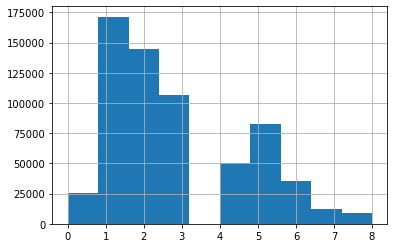

In [8]:
# We see most pricing is between 1 and 40 so we will 
# pull those out to see a more detailed lay out
# This requires creating a new column to hold this new catorgey

df_lean['price_cat'] = pd.cut(df_lean['price'],
                             bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, np.inf],
                             labels=[0, 1, 2, 3, 4, 5, 6, 7, 8])

df_lean['price_cat'].hist()

### Compare cab-types across price range

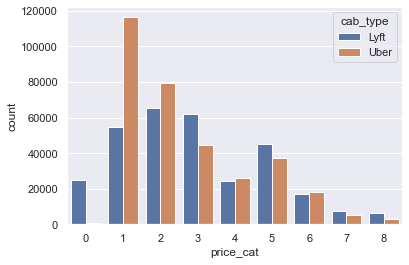

In [9]:
color_scheme = df_lean['cab_type']
plot_data = df_lean[['price_cat']]

mini_plot(color_scheme, plot_data)

###  Compare

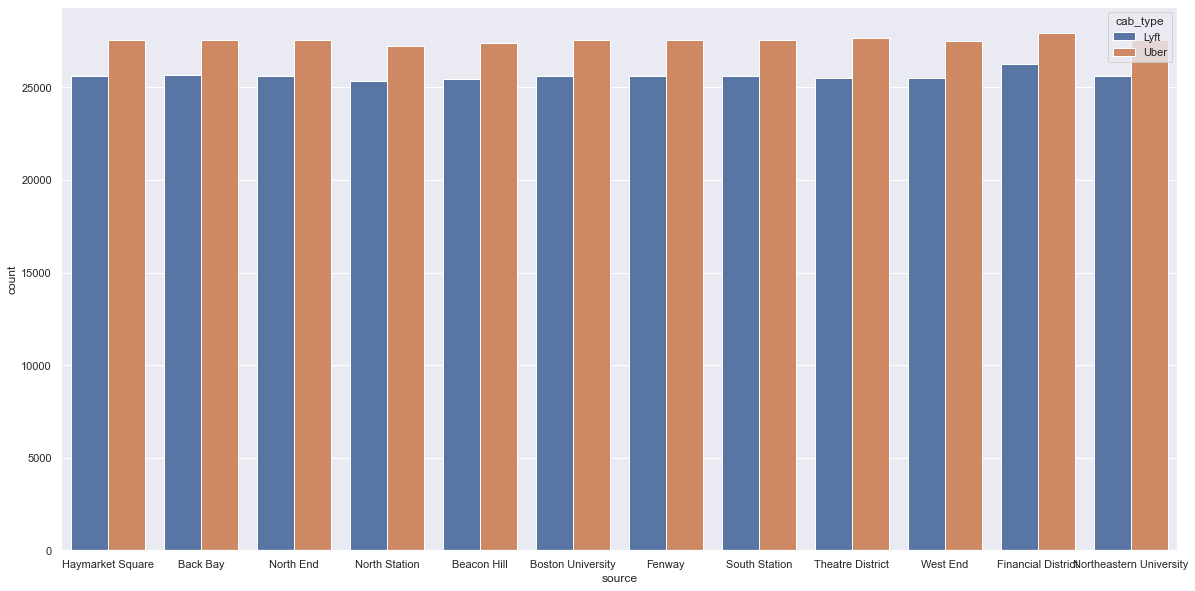

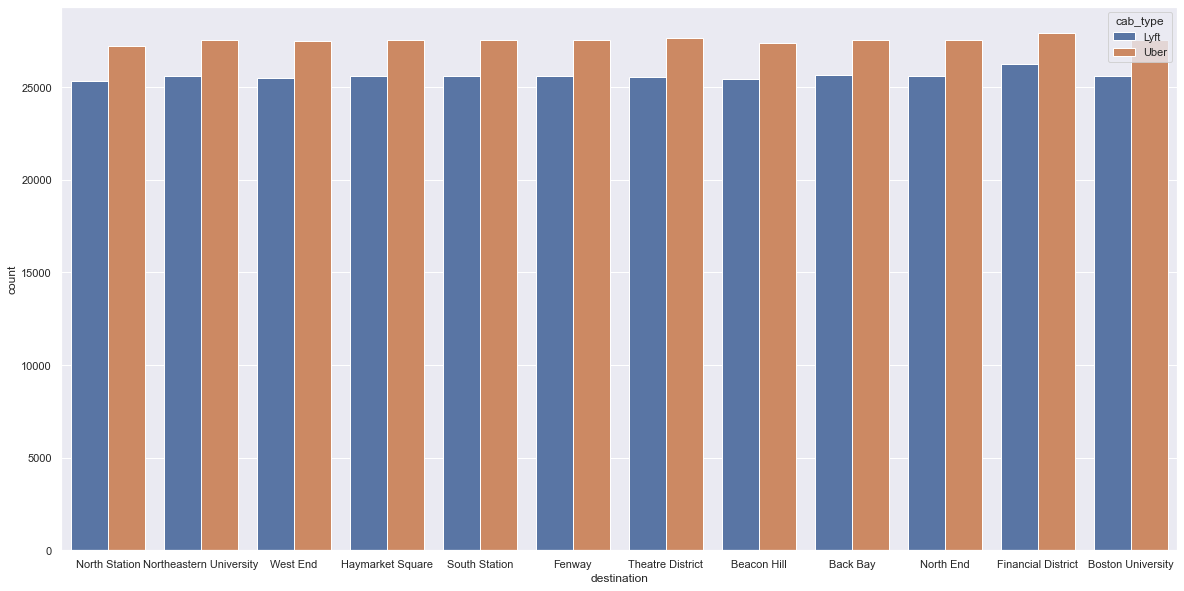

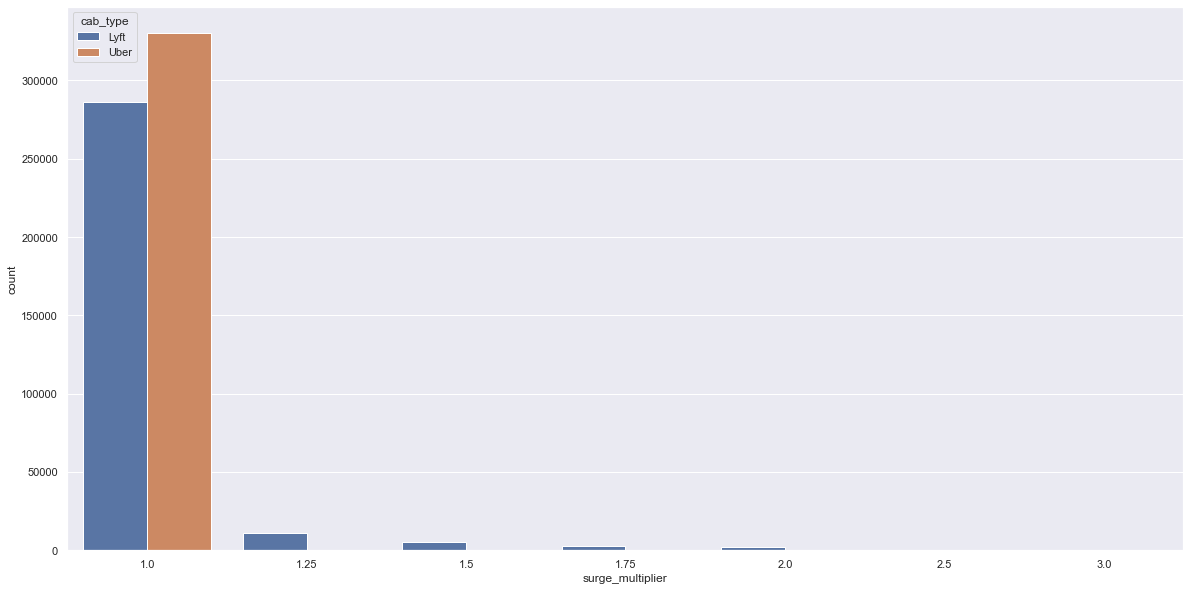

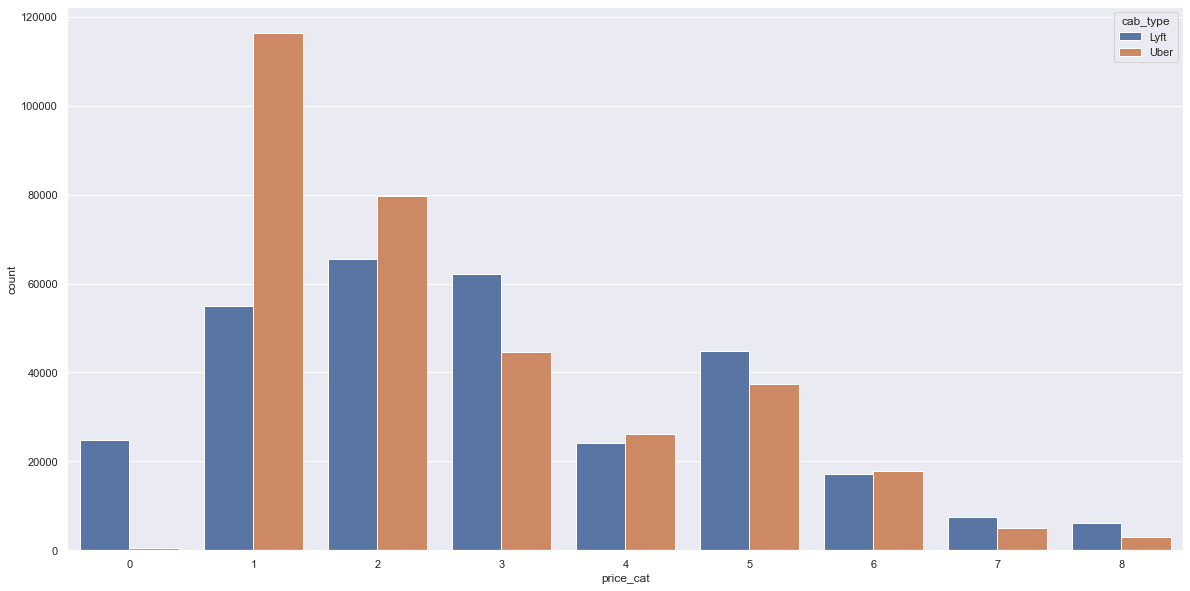

In [10]:
color_scheme = df_lean['cab_type']

plot_data = df_lean[['source','destination','surge_multiplier', 'price_cat']]

mini_plot(color_scheme, plot_data)

### Comparing price category
* Source location
* Destination location
* Cab service

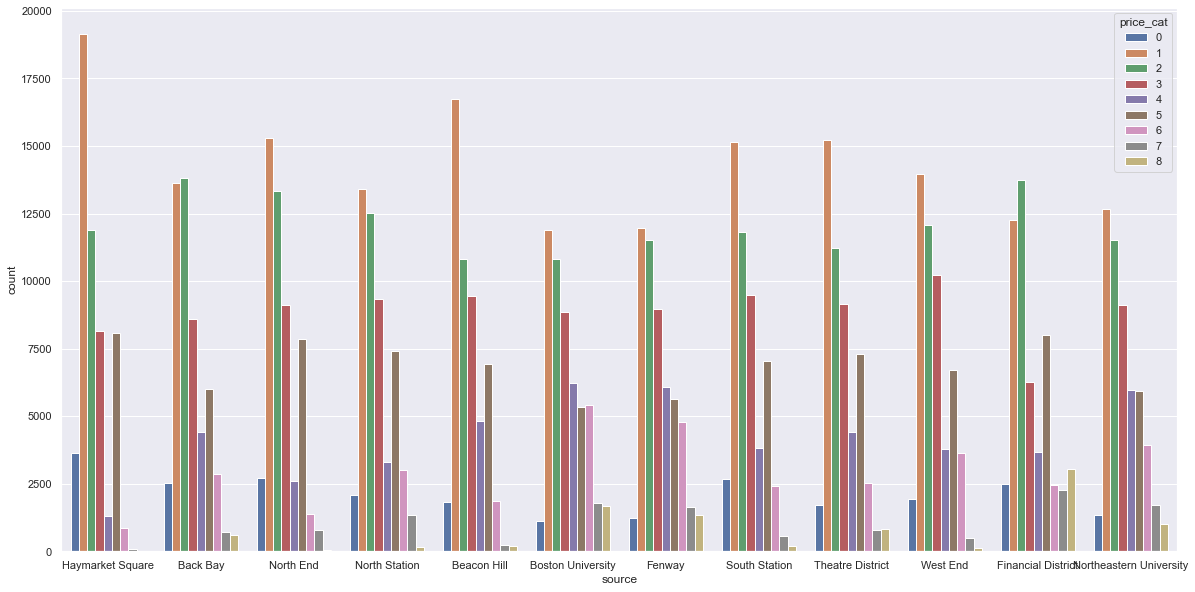

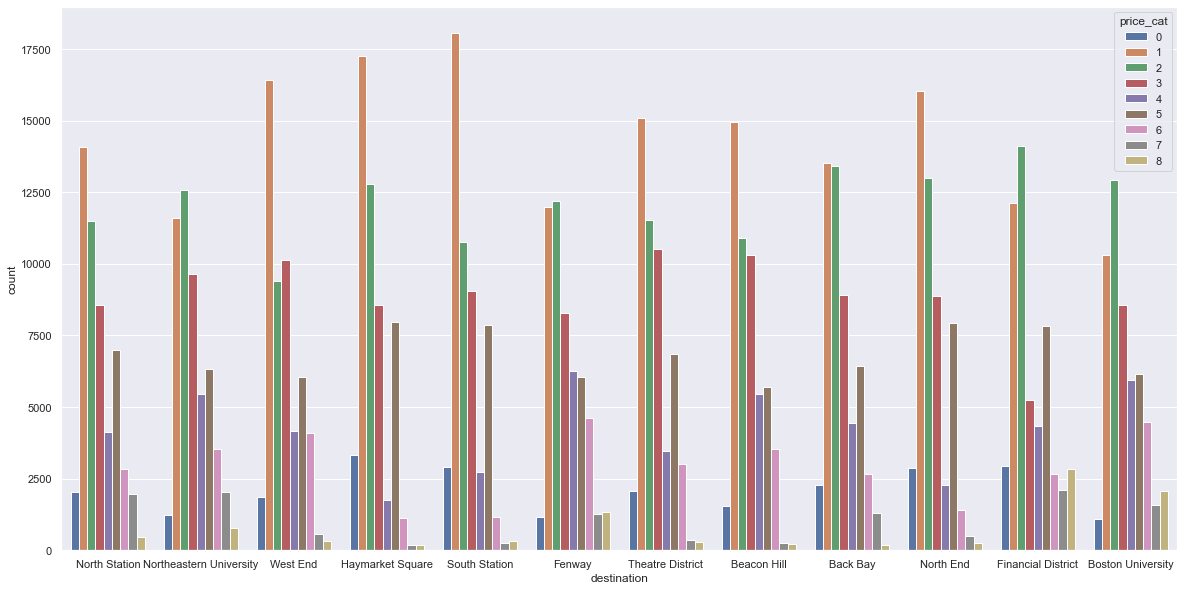

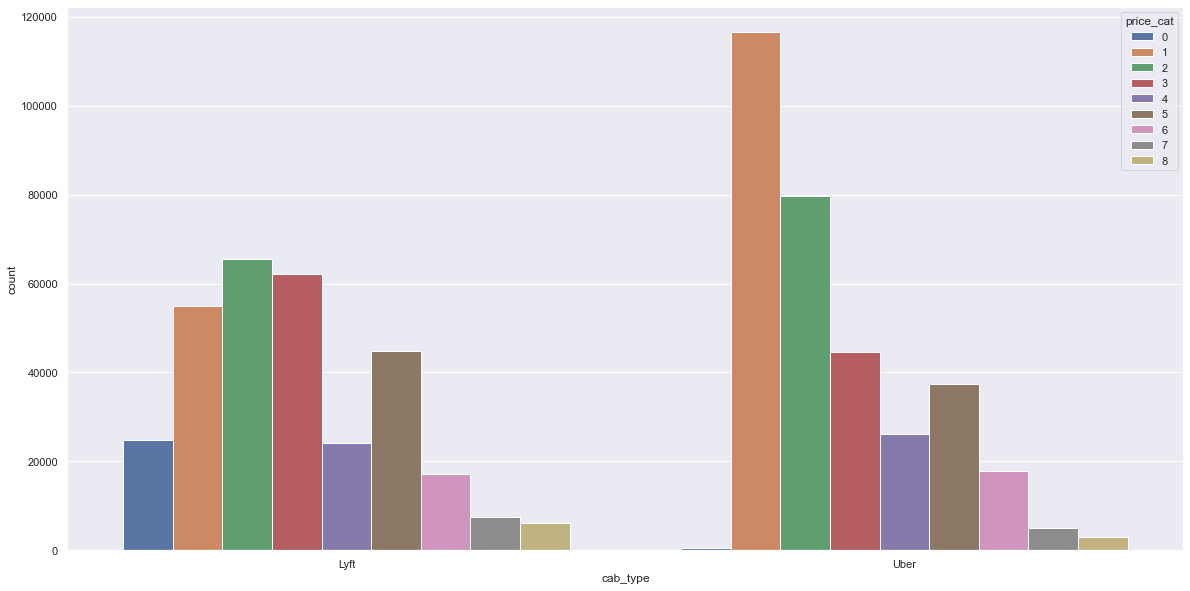

In [11]:
color_scheme = df_lean['price_cat']

plot_data = df_lean[['source','destination','cab_type']]

mini_plot(color_scheme, plot_data)

### Compare service against price category

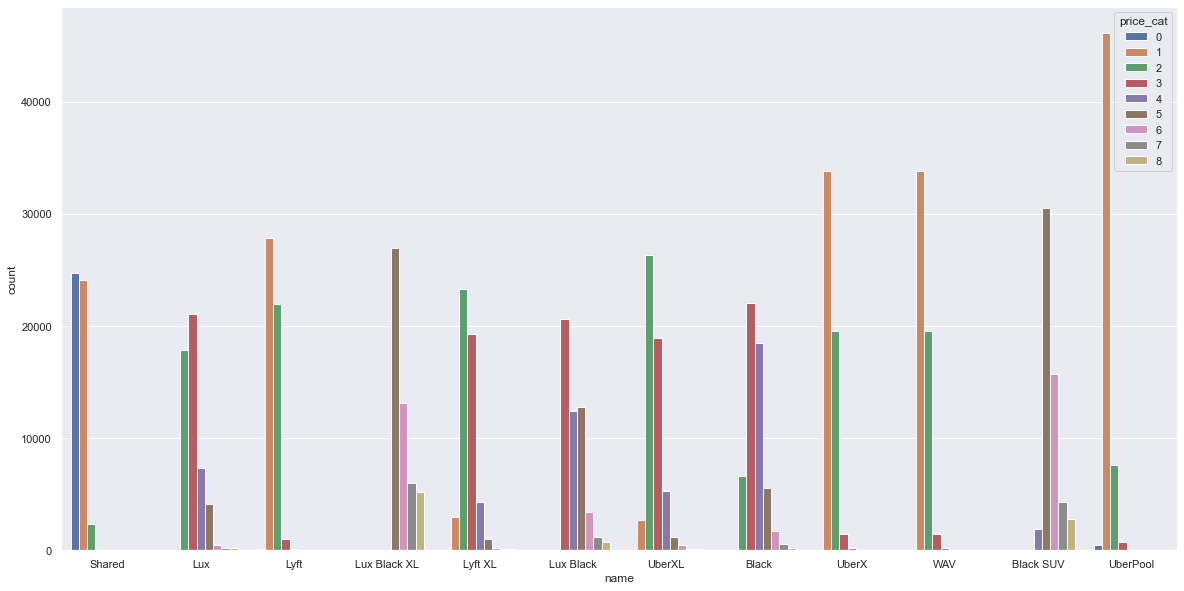

In [12]:
color_scheme = df_lean['price_cat']
plot_data = df_lean[['name']]

mini_plot(color_scheme, plot_data)

### Looking for Correlations

In [13]:
corr_matrix = df_lean.corr()

corr_matrix['price'].sort_values(ascending=False)

price                  1.000000
distance               0.345061
surge_multiplier       0.240458
month                  0.000913
hour                   0.000561
temperature           -0.000084
apparentTemperature   -0.000193
precipProbability     -0.000243
day                   -0.000722
Name: price, dtype: float64

<AxesSubplot:>

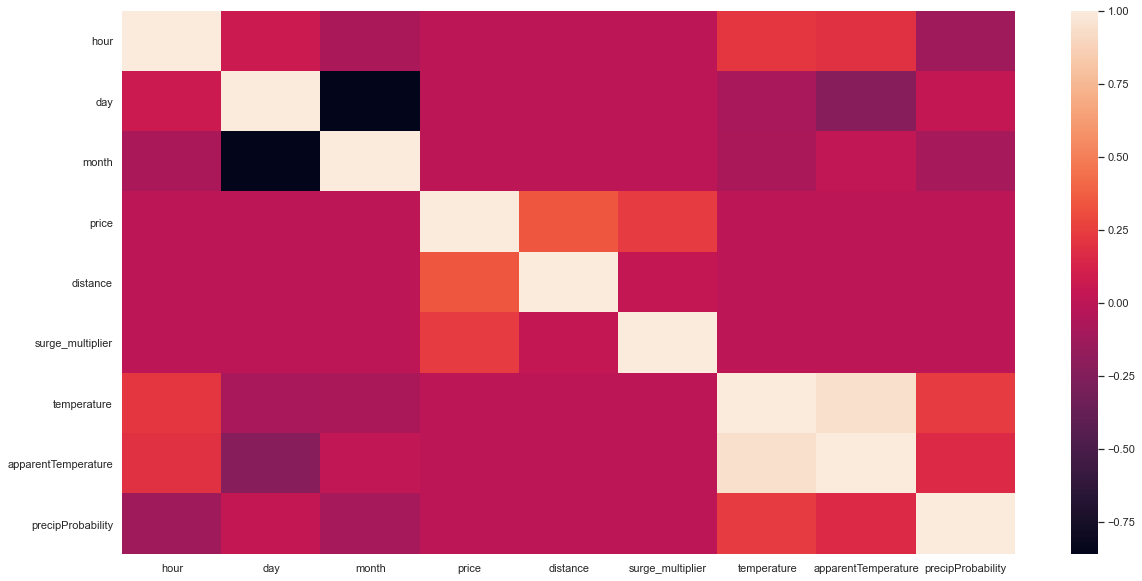

In [14]:
sns.heatmap(corr_matrix)

In [15]:
from pandas.plotting import scatter_matrix

attributes = ['price_cat', 'distance','surge_multiplier', 'name_label','hour']

scatter_matrix(df_lean[attributes], figsize=(15,10))

KeyError: "['name_label'] not in index"

# Machine Learning

## Encode categorical features

In [ ]:
# Create encoded columns for categorical variables

df_lean['source_label'] = col_encoder(df_lean['source'])
df_lean['destination_label'] = col_encoder(df_lean['destination'])
df_lean['cab_label'] = col_encoder(df_lean['cab_type'])
df_lean['name_label'] = col_encoder(df_lean['name'])
df_lean['weather_label'] = col_encoder(df_lean['short_summary'])

In [ ]:
df_lean

In [ ]:
%matplotlib inline

df_lean.hist(bins=20, figsize=(20,15))
plt.show()

## Create train/test sets

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedShuffleSplit 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [ ]:
#Standard train_test_split
X_train, X_test = train_test_split(df_lean, test_size = 0.2, random_state = 42)

In [ ]:
# Standard Scaler preprocessing

X_train = sc.fit_transform(X_train)
X_test = 

### Stratified sampling

In [ ]:
#Stratified sampling based on pricing category
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df_lean, df_lean['price_cat']):
    strat_train_set = df_lean.loc[train_index]
    strat_test_set = df_lean.loc[test_index]

### K Folds

In [ ]:
df_lean.plot(kind='scatter', x=distance)